In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

output_directory = '/home/marco/DataspellProjects/thesis/output/opls/'

palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set(style="whitegrid", font_scale=1.5)
sns.set_palette(palette)

df = pd.read_csv('/home/marco/DataspellProjects/thesis/data/ST002498_balanced_standard.csv')

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

components = 150


In [44]:
from pyopls import OPLS
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_predict, StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
opls = OPLS(components)
Z = opls.fit_transform(X, y)
pls = PLSRegression(1)

# Cross-validated predictions
y_pred = cross_val_predict(pls, Z, y, cv=cv, method='predict')

# Calculate ROC curve and ROC AUC score
fpr, tpr, _ = roc_curve(y_true=y, y_score=y_pred)
roc_auc = auc(fpr, tpr)

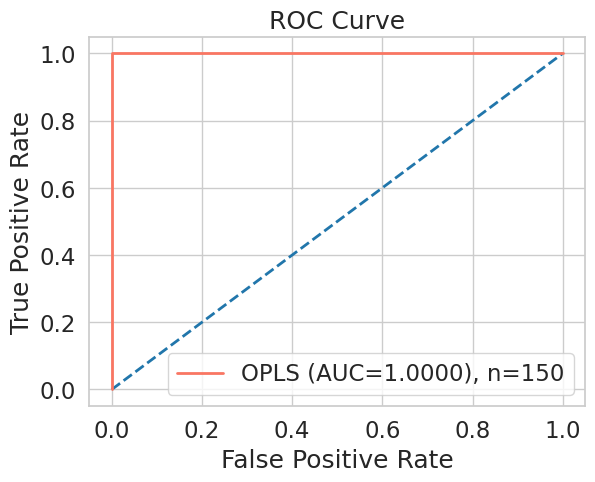

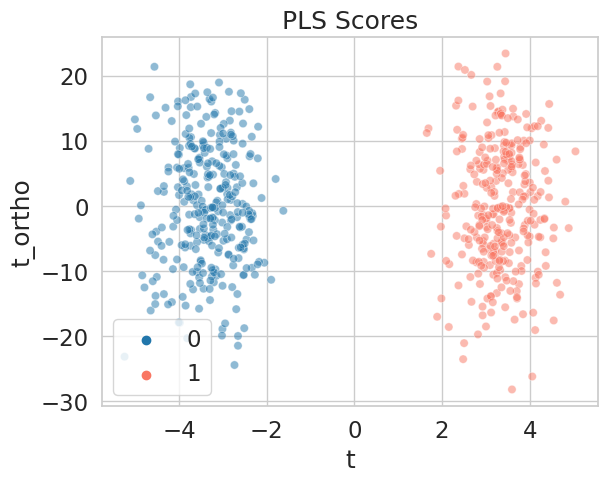

In [45]:

plt.figure(0)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.plot(fpr, tpr, lw=2, label=f'OPLS (AUC={roc_auc:.4f}), n={components}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



plt.figure(1)
pls.fit(Z, y)
df = pd.DataFrame(np.column_stack([pls.x_scores_, opls.T_ortho_[:, 0]]),index=X.index, columns=['t', 't_ortho'])
sns.scatterplot(x='t', y='t_ortho', hue=y, data=df, alpha=0.5, markers=['o', '^'])
plt.title('PLS Scores')
plt.xlabel('t')
plt.ylabel('t_ortho')
plt.legend(loc='lower left')

plt.show()